# 🌍 *Analyzing the World Happiness Report*


## 📚 About the Dataset

The dataset comes from the **World Happiness Report 2021**. It ranks 149 countries based on their citizens' self-reported well-being — measured through the **Ladder score** — and breaks down the contributing factors. 

### 📈 **Scope**
- **Countries:** 149  
- **Regions:** 10  
- **Year:** 2021  
- **Data Source:** World Happiness Report, using Gallup World Poll data and official statistics.  

---

## 🏷️ Understanding the Columns

### 🌟 **Core Columns**
- **Country name:** Name of each country (e.g., Finland, Denmark).  
- **Regional indicator:** The region the country belongs to (e.g., Western Europe, Sub-Saharan Africa).  
- **Ladder score:** Main happiness measure — an average response to the question:  
  Imagine a ladder with steps from 0 (worst possible life) to 10 (best possible life).   

### 📊 **Explanatory Factors**
Happiness is shaped by several factors, each quantified in the dataset:

1. **Logged GDP per capita:** Economic prosperity, measured in terms of purchasing power parity (PPP).  
2. **Social support:** Strength of personal relationships — based on whether someone has support during difficult times.  
3. **Healthy life expectancy:** Average years a newborn can expect to live in good health.  
4. **Freedom to make life choices:** Perceived freedom in making life decisions.  
5. **Generosity:** National average donations to charity, adjusted for economic wealth.  
6. **Perceptions of corruption:** Trust in institutions — how widespread people believe corruption is in government or business.  

### 🔍 **Regression-Based Columns**
The Ladder score is modeled as the sum of contributing factors:

\[
\text{Ladder score} = \text{GDP} + \text{Social support} + \text{Health} + \text{Freedom} + \text{Generosity} + \text{Corruption} + \text{Dystopia + residual}
\]

- **Dystopia score (2.43):** A hypothetical "worst-case" country used as a baseline for comparison.  
- **Explained by [factor]:** Quantifies how much each factor contributes to a country’s happiness.  
- **Dystopia + residual:** Captures what cannot be explained by the six main factors — like cultural, historical, or political influences.  


---

## 🔬 Key Correlations: What Drives Happiness?

### 💸 **Happiness vs. GDP per capita**
- **Strong positive correlation:** Countries with higher GDP scores tend to have higher happiness scores.  
- However, **GDP isn't everything** — some Latin American countries show high happiness despite modest economic scores, hinting at the importance of social and cultural factors.

### 🤝 **Happiness vs. Social support**
- One of the **strongest predictors** of happiness — even countries with lower GDP (like Costa Rica) rank high due to strong community bonds.  

### 🚨 **Happiness vs. Corruption**
- **Negative correlation:** Countries with higher corruption scores report lower happiness levels.  
- **Trust matters** — countries like Finland and Denmark benefit from low perceived corruption.  

---

## 🎯 Conclusion: What Have We Learned?

From the World Happiness Report data, we see that happiness isn't driven by a single factor — it's a **complex interplay** of:

1. **Economic strength:** GDP per capita matters, but it’s not the whole story.  
2. **Social connections:** A supportive community boosts happiness, even when wealth is limited.  
3. **Health and freedom:** Long, healthy lives and personal autonomy are key contributors.  
4. **Trust in institutions:** Low corruption increases national well-being.  


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, label_binarize, OrdinalEncoder
%matplotlib inline

In [172]:
plt.style.use('seaborn-v0_8-darkgrid')

# Custom color palette and background
background_color = '#F5F5F5'  # Light gray background
text_color = '#2D3047'        # Dark blue-gray for text
accent_color = '#E63946'      # Vibrant red accent
title_font_size = 18
label_font_size = 14
tick_font_size = 12

# Apply custom styling
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana', 'Arial', 'Helvetica']
plt.rcParams['figure.facecolor'] = background_color
plt.rcParams['axes.facecolor'] = background_color
plt.rcParams['axes.labelcolor'] = text_color
plt.rcParams['axes.titlecolor'] = text_color
plt.rcParams['axes.edgecolor'] = text_color
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.color'] = text_color
plt.rcParams['ytick.color'] = text_color
plt.rcParams['grid.color'] = '#E0E0E0'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5

# Hue color palette


In [173]:
world_happiness_through_years = pd.read_csv('archive/world-happiness-report.csv')
data = pd.read_csv('archive/world-happiness-report-2021.csv')

data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [174]:
data.shape

(149, 20)

In [175]:
numeric_cols = data.select_dtypes(include=['number']).columns
object_cols = data.select_dtypes(include=['object']).columns

if numeric_cols.empty:
    print("No numeric columns found.")
else:
    print("Numeric Columns:")
    for col in numeric_cols:
        print(f"- {col}")

print()  # Add a blank line for separation

if object_cols.empty:
    print("No object (string) columns found.")
else:
    print("Object (String) Columns:")
    for col in object_cols:
        print(f"- {col}")

Numeric Columns:
- Ladder score
- Standard error of ladder score
- upperwhisker
- lowerwhisker
- Logged GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption
- Ladder score in Dystopia
- Explained by: Log GDP per capita
- Explained by: Social support
- Explained by: Healthy life expectancy
- Explained by: Freedom to make life choices
- Explained by: Generosity
- Explained by: Perceptions of corruption
- Dystopia + residual

Object (String) Columns:
- Country name
- Regional indicator


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [177]:
data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [178]:
# Descriptive statistics by region
regional_stats = happy_df.groupby('Region').agg({
    'Happiness': ['mean', 'std', 'min', 'max'],
    'GDP': 'mean',
    'Health': 'mean'
}).round(2)

print("Regional Statistics:")
print(regional_stats)

Regional Statistics:
                                   Happiness                      GDP Health
                                        mean   std   min   max   mean   mean
Region                                                                      
Central and Eastern Europe              5.98  0.49  5.10  6.96  10.11  68.34
Commonwealth of Independent States      5.47  0.44  4.88  6.18   9.40  65.01
East Asia                               5.81  0.44  5.34  6.58  10.37  71.25
Latin America and Caribbean             5.91  0.69  3.62  7.07   9.37  67.08
Middle East and North Africa            5.22  1.00  3.66  7.16   9.67  65.61
North America and ANZ                   7.13  0.14  6.95  7.28  10.81  72.32
South Asia                              4.44  0.99  2.52  5.27   8.68  62.68
Southeast Asia                          5.41  0.61  4.43  6.38   9.42  64.89
Sub-Saharan Africa                      4.49  0.65  3.14  6.05   8.08  55.89
Western Europe                          6.91  0.66  5.5

In [179]:
data_columns = ['Country name', 'Ladder score', 'Regional indicator', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [180]:
happy_df = data[data_columns]
happy_df.columns = ['Country', 'Happiness', 'Region', 'GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption']


In [181]:
happy_df.head()

,Country,Happiness,Region,GDP,Social,Health,Freedom,Generosity,Corruption
0,Finland,7.842,Western Europe,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,7.620,Western Europe,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,7.571,Western Europe,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,7.554,Western Europe,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,7.464,Western Europe,10.932,0.942,72.4,0.913,0.175,0.338


In [182]:
happy_df.shape

(149, 9)

In [183]:
happy_df.isnull().sum()

Country       0
Happiness     0
Region        0
GDP           0
Social        0
Health        0
Freedom       0
Generosity    0
Corruption    0
dtype: int64

In [184]:
happy_df.describe()


,Happiness,GDP,Social,Health,Freedom,Generosity,Corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [185]:
# summary statistics for categorical columns
happy_df.describe(include='O')

,Country,Region
count,149,149
unique,149,10
top,Finland,Sub-Saharan Africa
freq,1,36


# Data Visualization

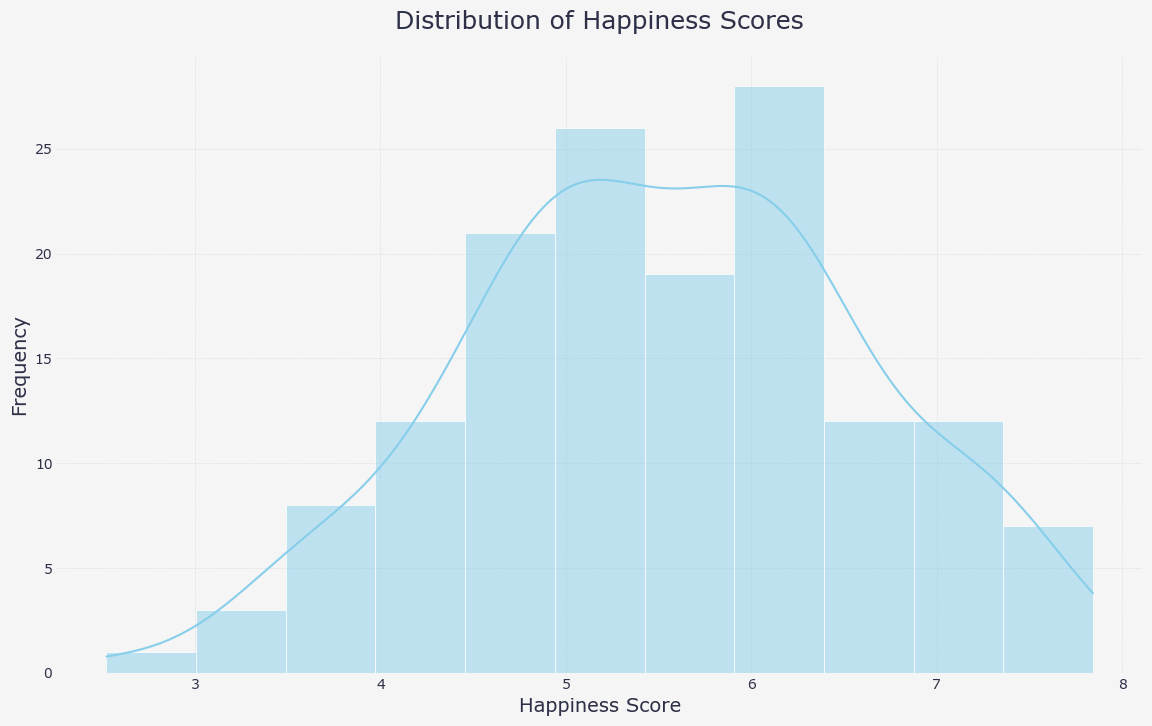

In [186]:
sns.histplot(
    data=happy_df, 
    x='Happiness', 
    color = 'skyblue',
    linewidth=0.5,
    kde=True)

plt.title(
    'Distribution of Happiness Scores',
    fontsize=title_font_size,
    color=text_color,
    pad=20
    )
plt.xlabel('Happiness Score', fontsize=label_font_size, color=text_color)
plt.ylabel('Frequency', fontsize=label_font_size, color=text_color)
plt.show()

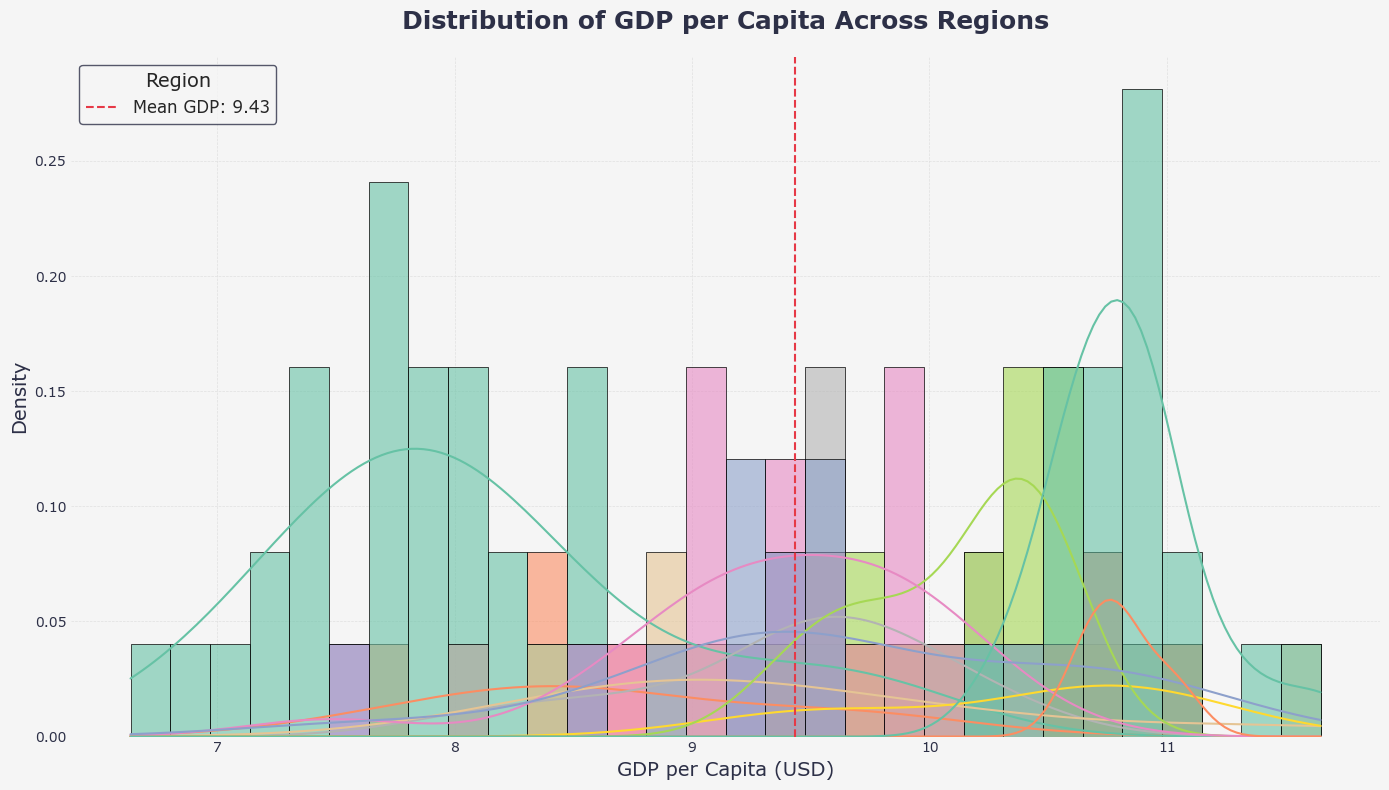

In [187]:
histplot = sns.histplot(
    data=happy_df,
    x='GDP',
    hue='Region',
    bins=30,
    palette='Set2',  
    kde=True,
    stat='density',
    alpha=0.6,
    edgecolor='black',
    linewidth=0.5
)

plt.title('Distribution of GDP per Capita Across Regions', 
          fontsize=title_font_size,  
          fontweight='bold', 
          pad=20)
plt.xlabel('GDP per Capita (USD)', fontsize=label_font_size)  # 14
plt.ylabel('Density', fontsize=label_font_size)  # 14


mean_gdp = happy_df['GDP'].mean()
plt.axvline(mean_gdp, color=accent_color, linestyle='--', linewidth=1.5, label=f'Mean GDP: {mean_gdp:.2f}')
plt.legend()

plt.legend(title='Region', 
           title_fontsize=label_font_size,  # 14
           fontsize=tick_font_size,  # 12
           loc='upper left', 
           frameon=True, 
           edgecolor=text_color)  # '#2D3047'

plt.tight_layout()
plt.show()

C:\Users\Wahaj\AppData\Local\Temp\ipykernel_17872\3398441444.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(
C:\Users\Wahaj\AppData\Local\Temp\ipykernel_17872\3398441444.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region', loc='upper left', borderaxespad=0, fontsize=10)


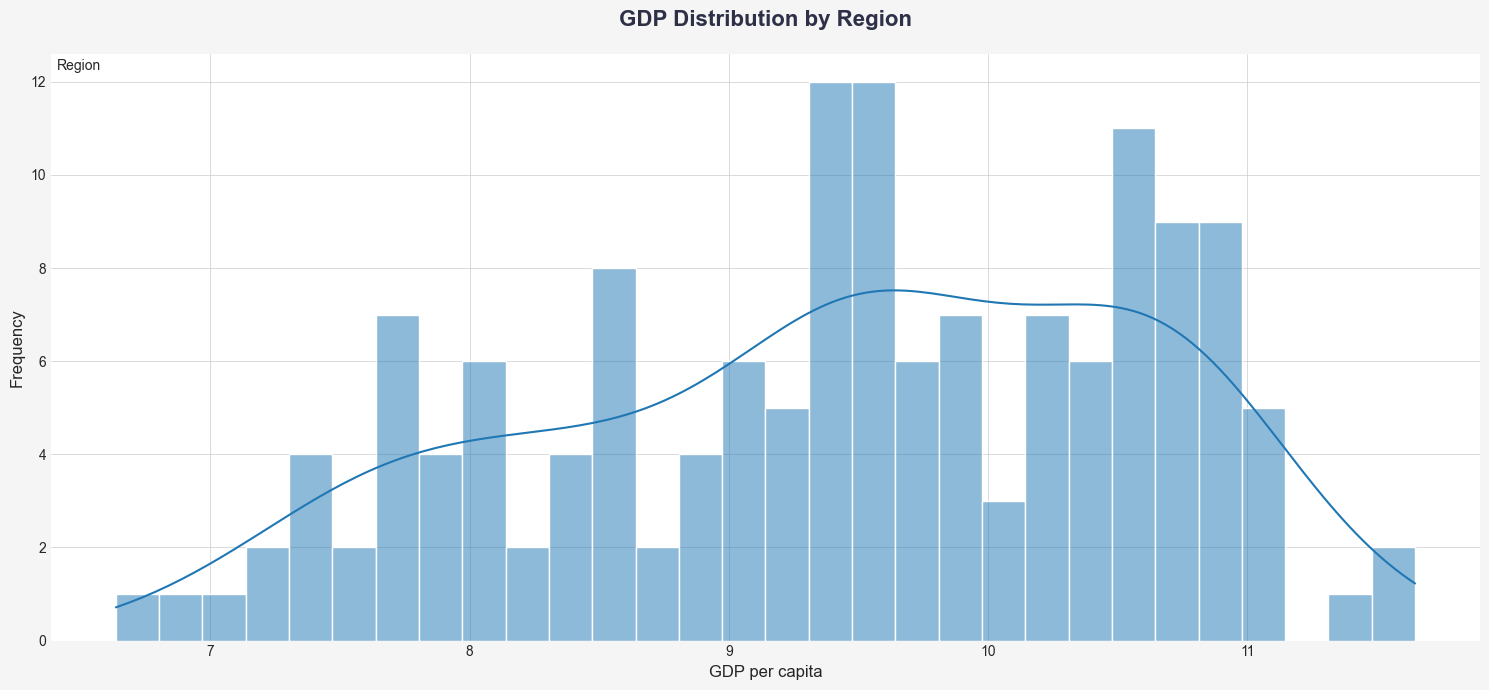

In [188]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid") #set style

histplot = sns.histplot(
    data=happy_df,
    x='GDP',
    
    bins=30,
    palette='Set2',
    kde=True
)

# Enhanced title and labels
plt.title('GDP Distribution by Region', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('GDP per capita', fontsize=12)
plt.ylabel('Frequency', fontsize=12) #added Y label.

# Improved legend
plt.legend(title='Region', loc='upper left', borderaxespad=0, fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

In [189]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

happiness_outliers = find_outliers(happy_df, 'Happiness')
print("\nOutliers in Happiness Scores:")
print(happiness_outliers[['Country', 'Happiness', 'Region']])


Outliers in Happiness Scores:
         Country  Happiness      Region
148  Afghanistan      2.523  South Asia


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Central and Eastern Europe'),
  Text(2, 0, 'Commonwealth of Independent States'),
  Text(3, 0, 'East Asia'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Middle East and North Africa'),
  Text(6, 0, 'North America and ANZ'),
  Text(7, 0, 'South Asia'),
  Text(8, 0, 'Southeast Asia'),
  Text(9, 0, 'Sub-Saharan Africa'),
  Text(10, 0, 'Western Europe')])

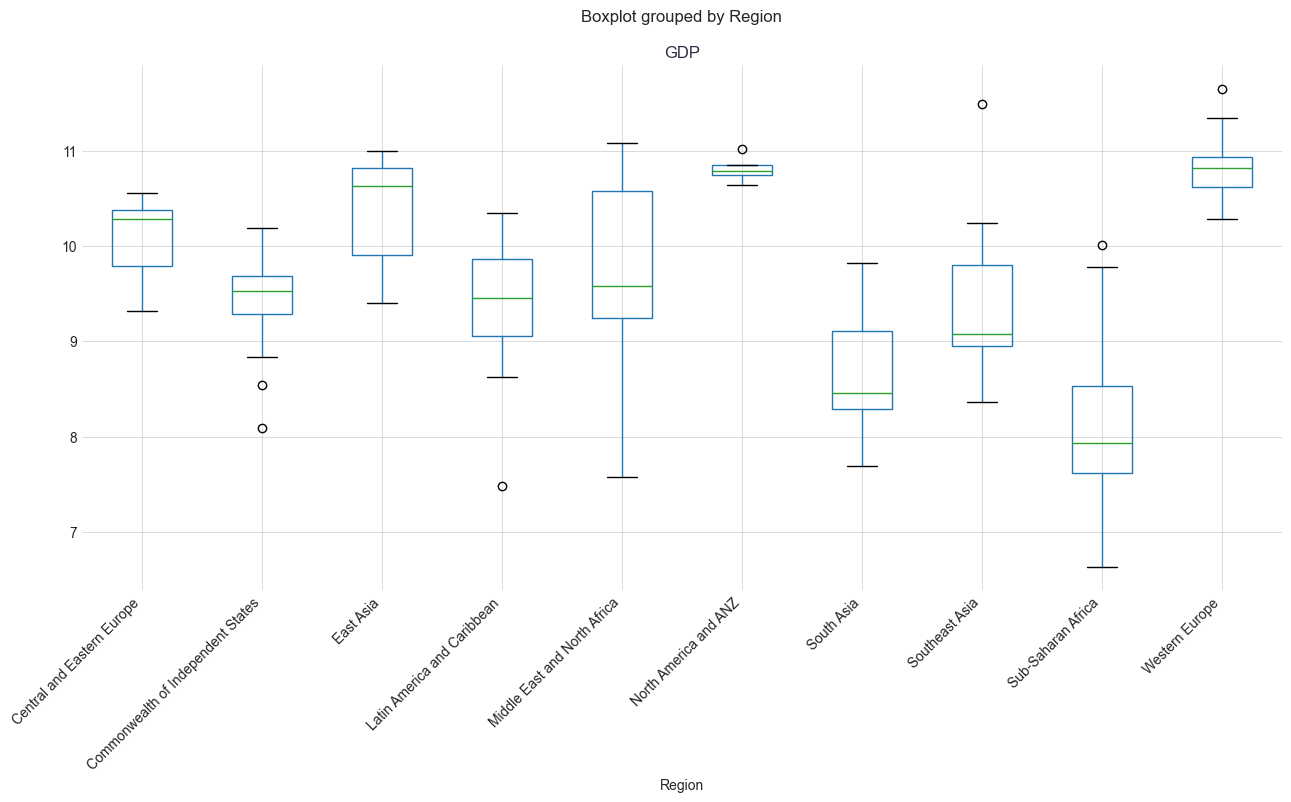

In [190]:
# to identify the outliers
happy_df.boxplot(
    column='GDP', 
    by='Region', 
    figsize=(15, 7)
    )
plt.xticks(rotation=45, ha='right')

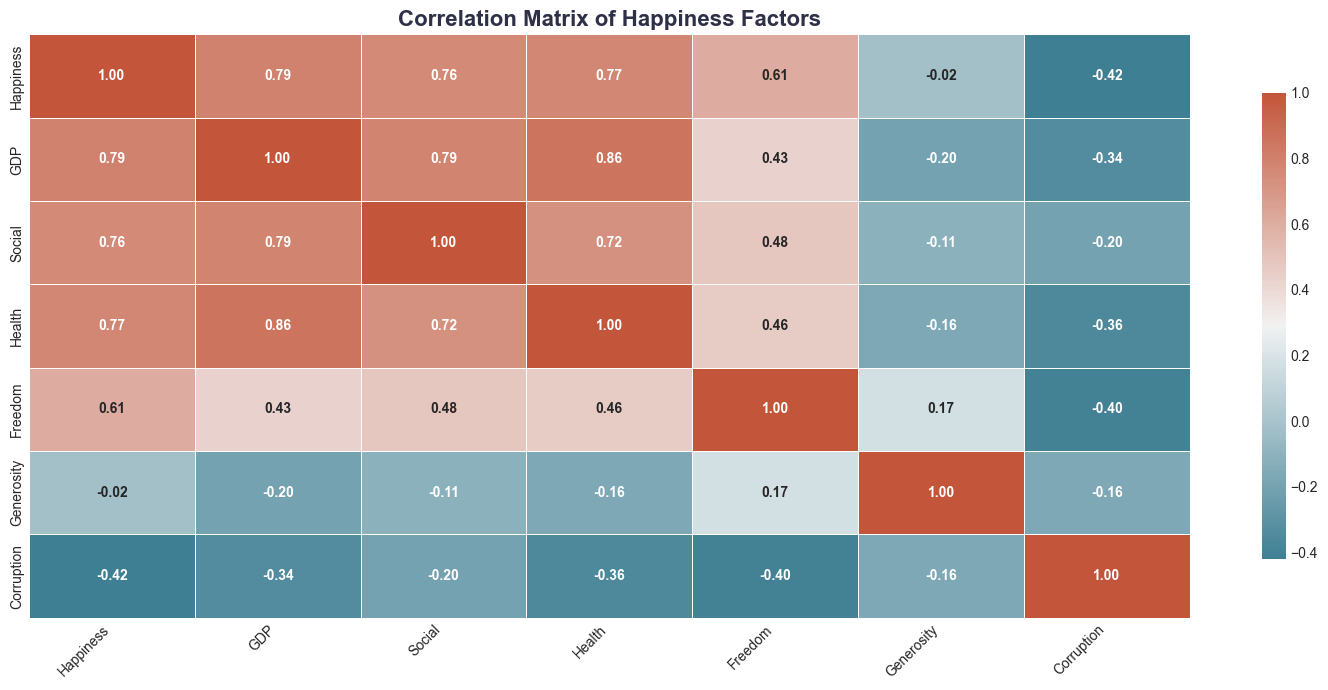

In [191]:
# Analyze the correlation between numerical columns
correlation_cols = ['Happiness', 'GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption']
correlation_matrix = happy_df[correlation_cols].corr(method='pearson')
plt.figure(figsize=(15, 7))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap=cmap, 
    fmt='.2f',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 10, 'weight': 'bold'}
    )
plt.title('Correlation Matrix of Happiness Factors',  fontsize=16, fontweight='bold', color=text_color)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()



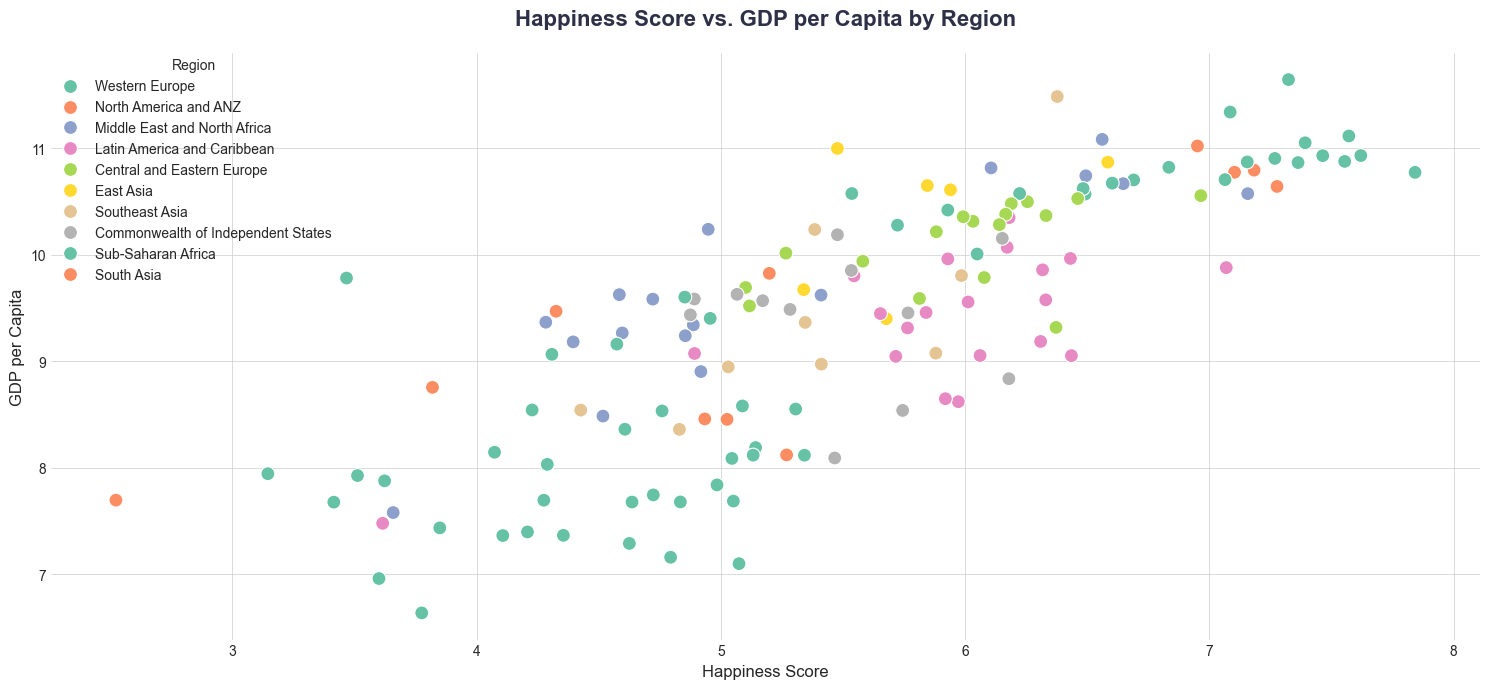

In [192]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Happiness Score vs. GDP per Capita by Region', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('GDP per Capita', fontsize=12)
sns.scatterplot(
    x=happy_df['Happiness'], 
    y=happy_df['GDP'], 
    hue=happy_df['Region'], hue_order=happy_df['Region'].unique(), palette='Set2', 
    s=100, 
    )

plt.legend(title='Region', loc='upper left', borderaxespad=0, fontsize=10)
plt.tight_layout()


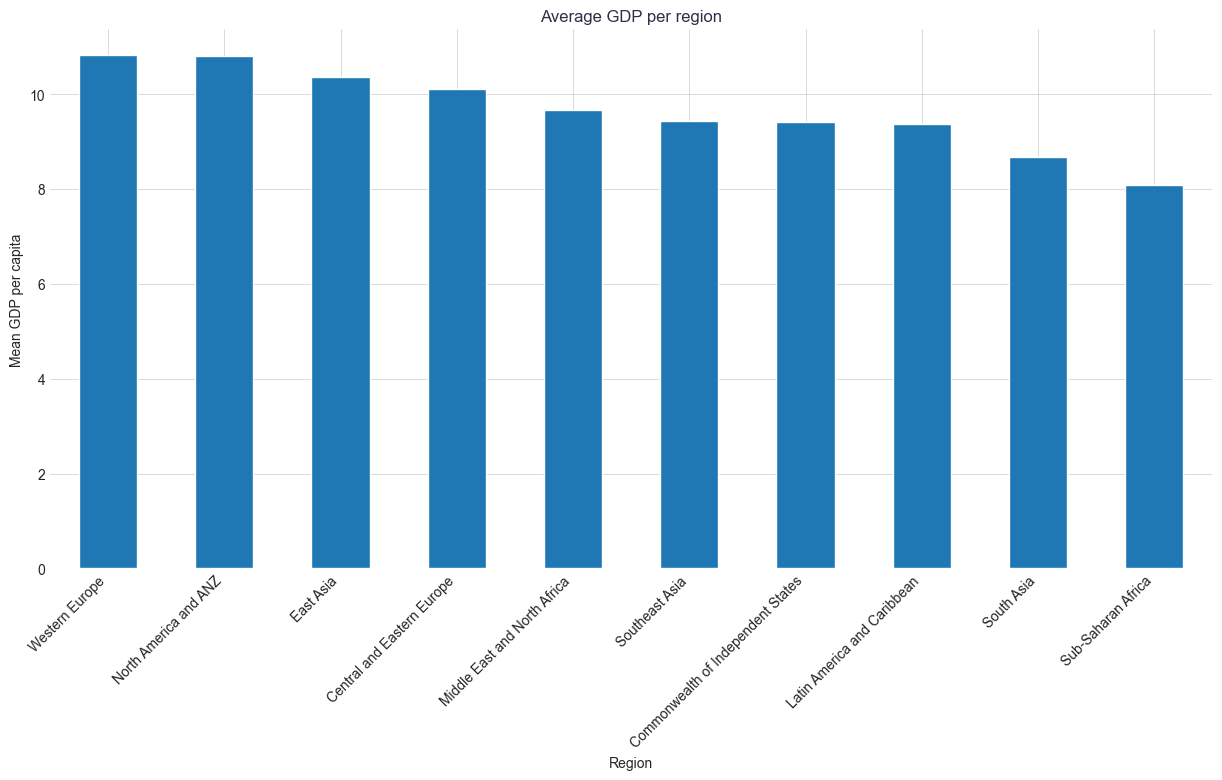

In [193]:
gdp_region = happy_df.groupby('Region')['GDP'].mean().sort_values(ascending=False)
gdp_region.plot(kind='bar')
plt.title('Average GDP per region')
plt.xlabel('Region')
plt.ylabel('Mean GDP per capita')
plt.xticks(rotation=45, ha='right')

plt.show()

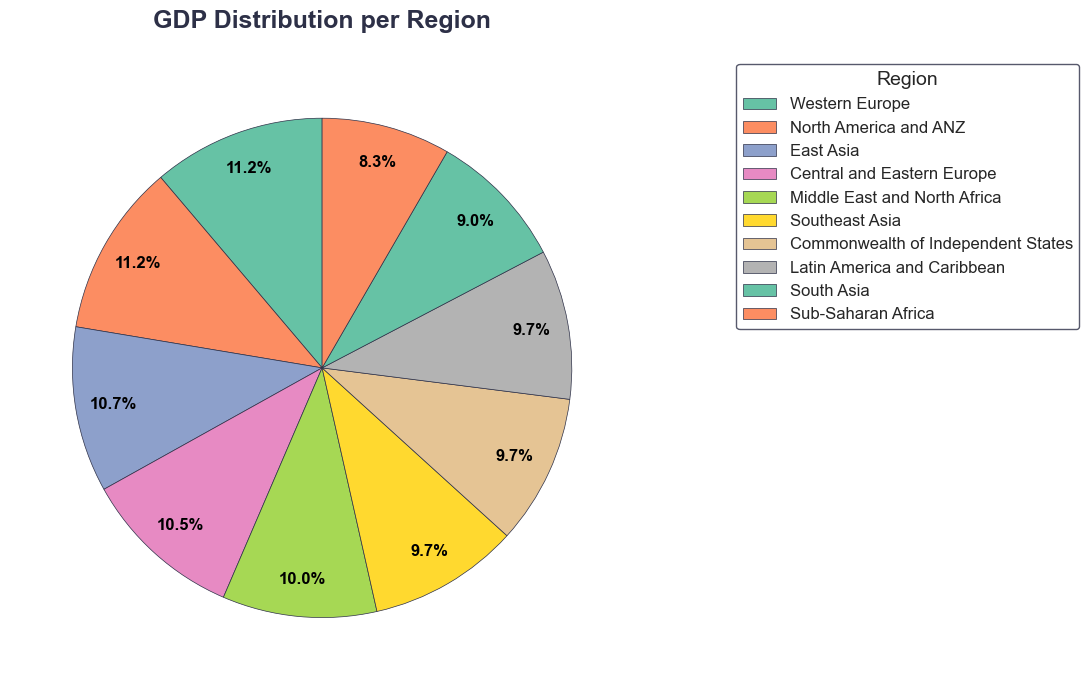

In [194]:
#gdp_region.plot.pie(autopct='%1.1f%%')
gdp_region.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2'),
    textprops={'fontsize': tick_font_size, 'color': 'black', 'weight': 'bold'},  # 12
    wedgeprops={'edgecolor': text_color, 'linewidth': 0.5},  # '#2D3047'
    startangle=90,
    pctdistance=0.85,
    labeldistance=None
)

plt.title('GDP Distribution per Region', 
          fontsize=title_font_size,  # 18
          fontweight='bold', 
          pad=20)

plt.ylabel('')

plt.legend(
    gdp_region.index,
    title='Region', 
    title_fontsize=label_font_size,  # 14
    fontsize=tick_font_size,  # 12
    loc='upper left', 
    bbox_to_anchor=(1.15, 1),
    frameon=True, 
    edgecolor=text_color  # '#2D3047'
)

plt.tight_layout()
plt.show()

In [195]:
# total number of countries per region
total_countries = happy_df['Region'].value_counts()
total_countries

Region
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: count, dtype: int64

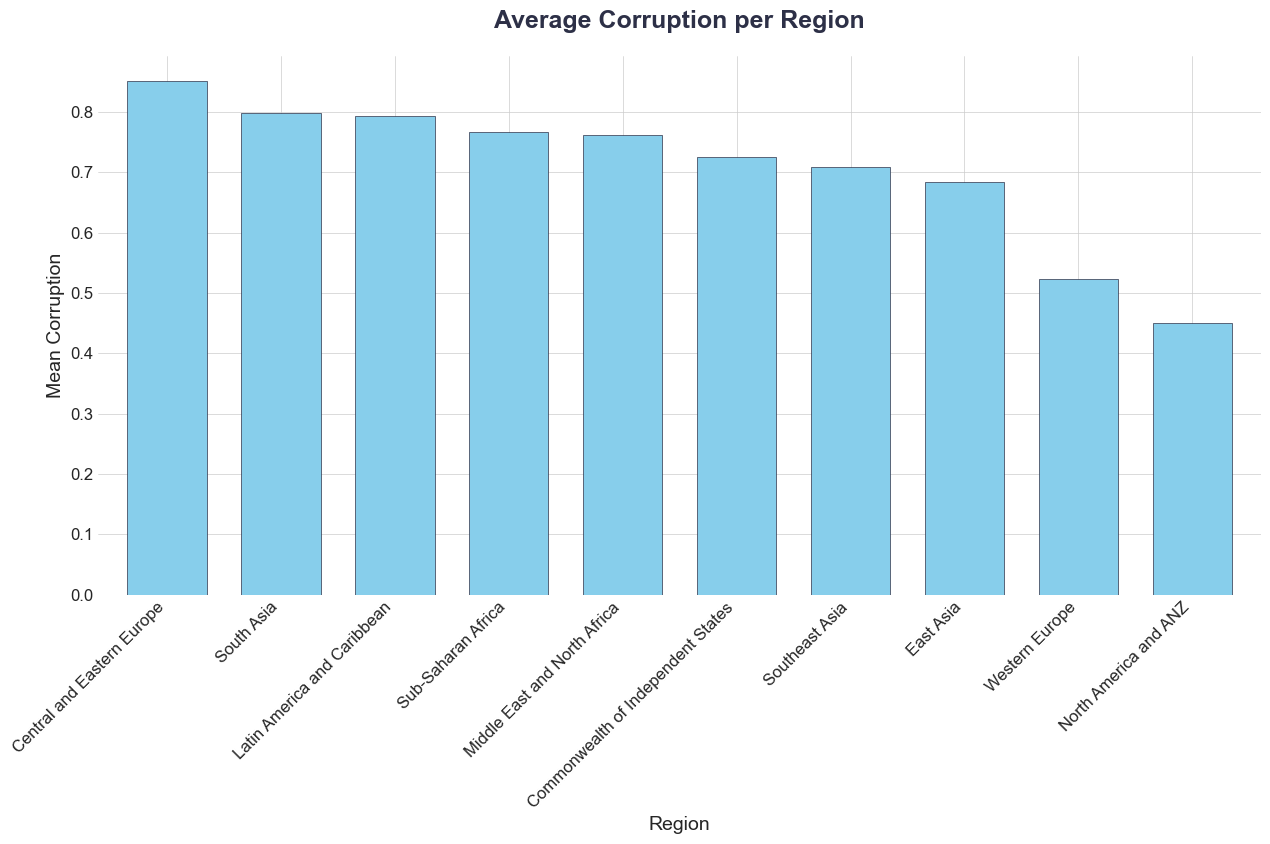

In [196]:
# corruption per region

corruption = happy_df.groupby('Region')['Corruption'].mean().sort_values(ascending=False)

corruption.plot(
    kind='bar',
    color='skyblue',  
    edgecolor=text_color,  
    linewidth=0.5,
    width=0.7  
)
plt.title('Average Corruption per Region', 
          fontsize=title_font_size,  
          fontweight='bold', 
          pad=20)
plt.xlabel('Region', fontsize=label_font_size)  # 14
plt.ylabel('Mean Corruption', fontsize=label_font_size)  # 14
plt.xticks(rotation=45, ha='right', fontsize=tick_font_size)  # 12
plt.yticks(fontsize=tick_font_size)
plt.show()

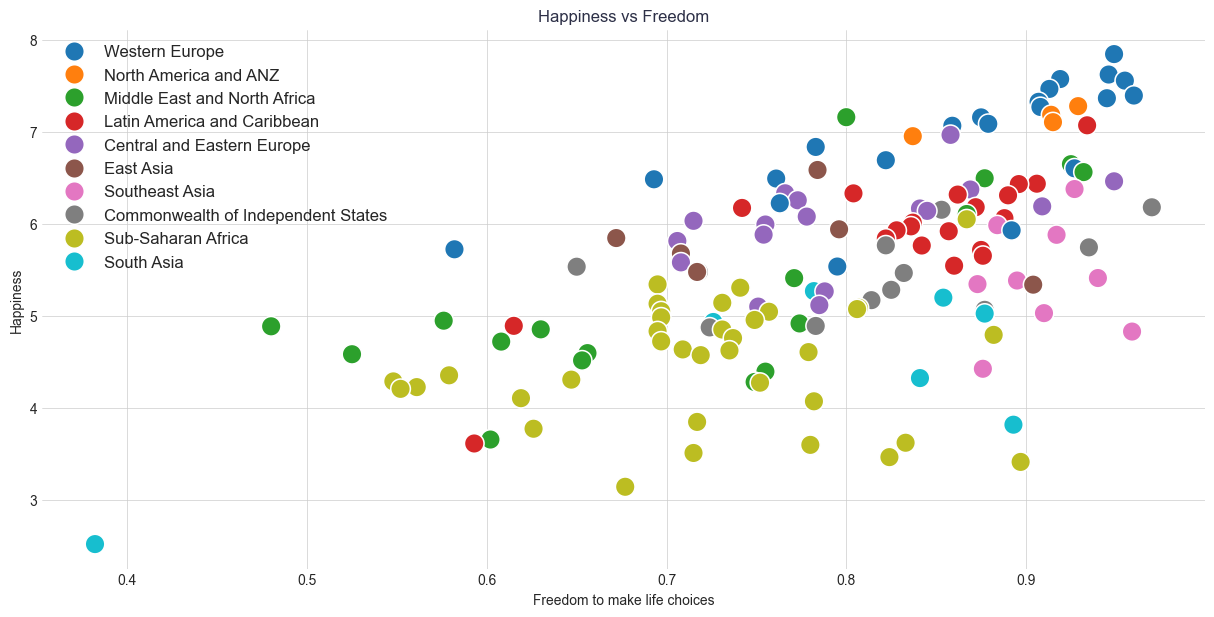

In [197]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x = happy_df['Freedom'], y = happy_df['Happiness'], s = 200, hue = happy_df['Region'])
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness')
plt.title('Happiness vs Freedom')
plt.show()


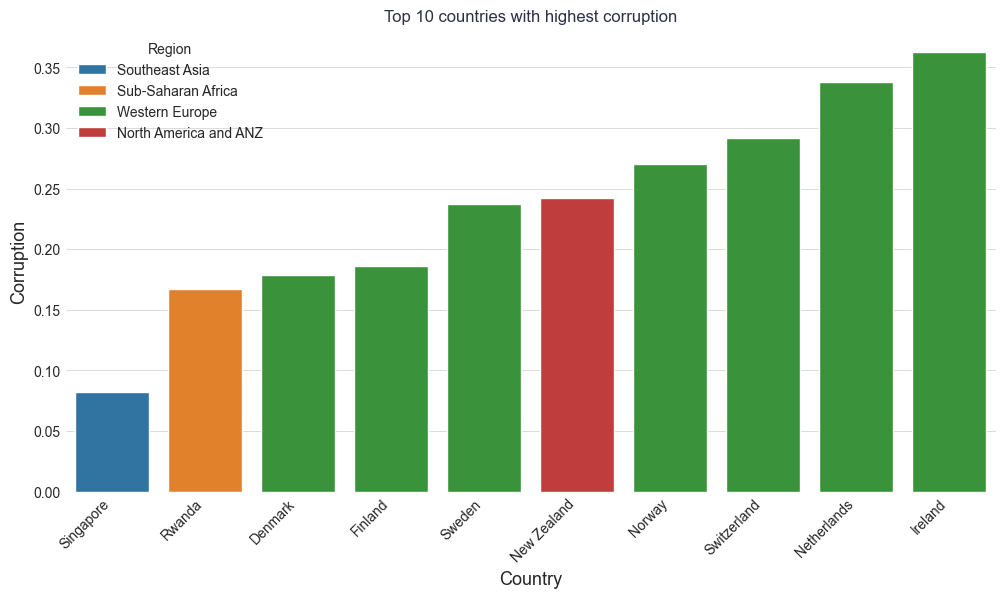

In [198]:
country = happy_df.sort_values(by='Corruption', ascending=True).head(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Top 10 countries with highest corruption')
sns.barplot(x=country['Country'], y=country['Corruption'], hue=country['Region'])
plt.xlabel('Country', fontsize=13)
plt.ylabel('Corruption', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.show()

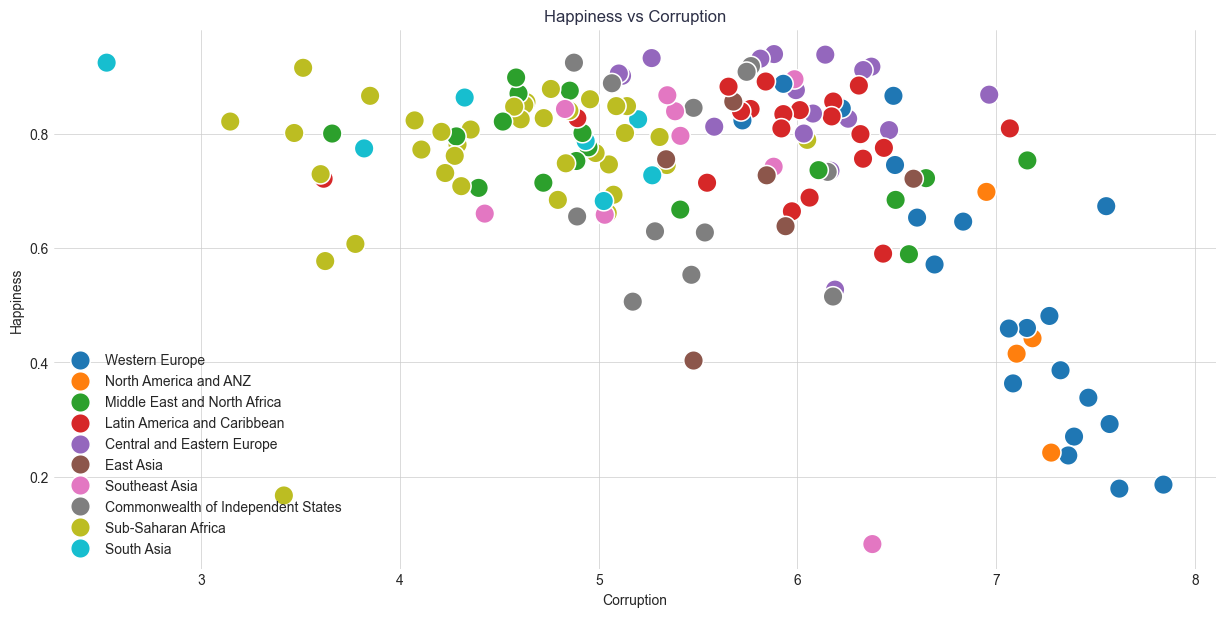

In [199]:
# corruption vs happiness
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x=happy_df['Happiness'], y=happy_df['Corruption'], s=200, hue=happy_df['Region'])
plt.legend(loc='lower left', fontsize=10)
plt.xlabel('Corruption')
plt.ylabel('Happiness')
plt.title('Happiness vs Corruption')
plt.show()

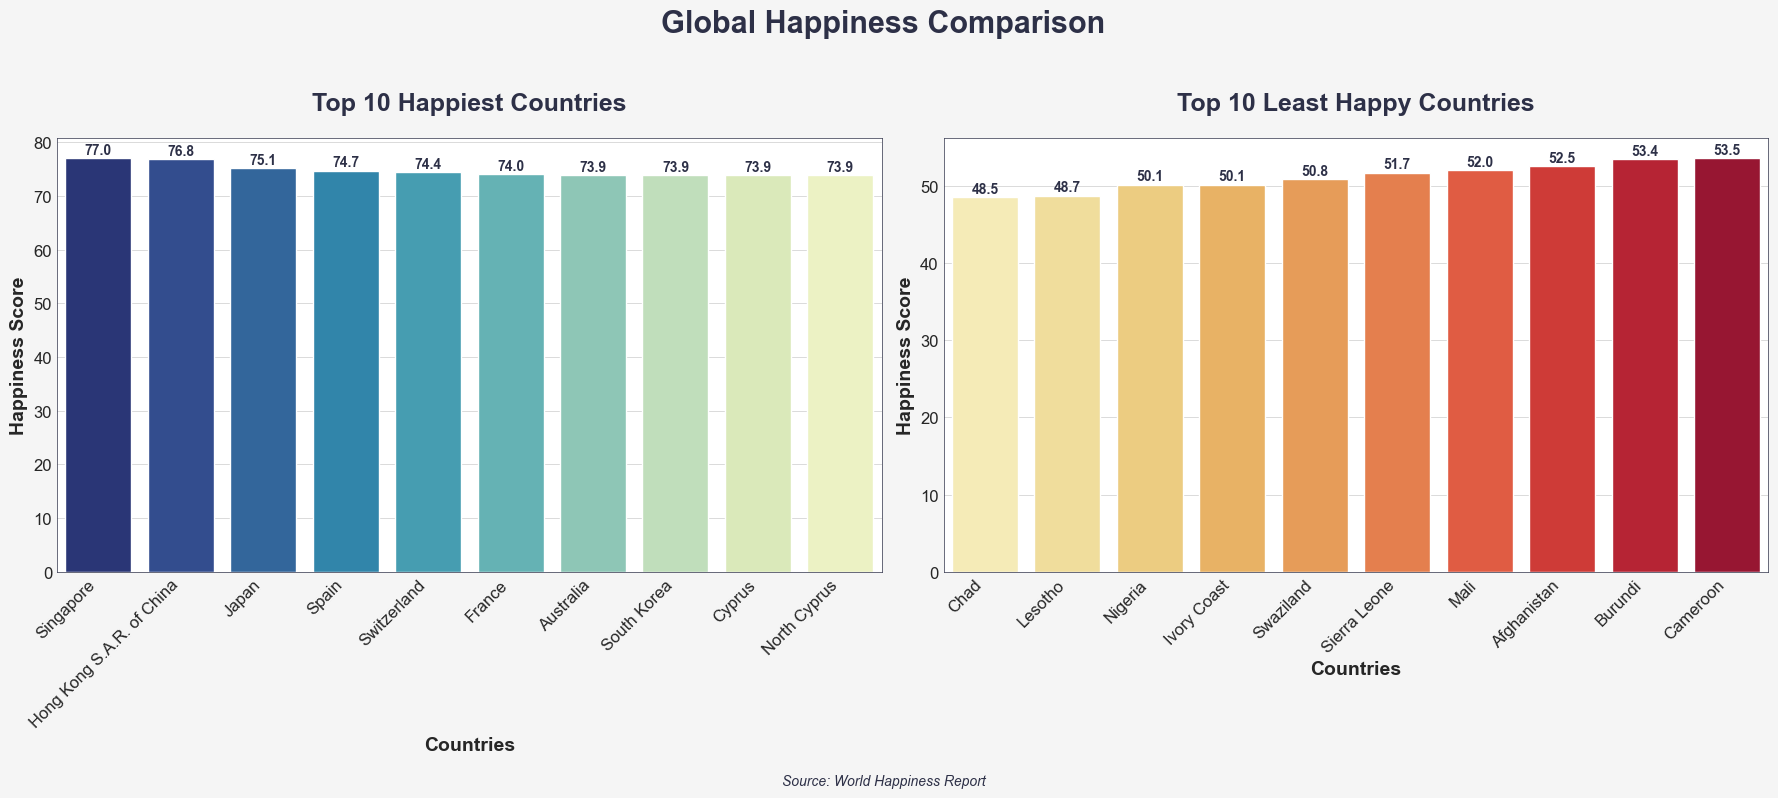

In [200]:
top_10_happy_sorted = top_10_happy.sort_values('Health', ascending=False)
top_10_least_happy_sorted = top_10_least_happy.sort_values('Health', ascending=True)

# Create figure with custom background
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.patch.set_facecolor(background_color)
plt.subplots_adjust(wspace=0.2, bottom=0.15)

# Create custom colormap for happy countries
happy_colors = sns.color_palette("YlGnBu_r", n_colors=len(top_10_happy_sorted))
least_happy_colors = sns.color_palette("YlOrRd", n_colors=len(top_10_least_happy_sorted))

# First subplot - Happiest countries
bars1 = sns.barplot(
    x='Country', 
    y='Health', 
    hue='Country',
    data=top_10_happy_sorted, 
    ax=axes[0],
    palette=happy_colors,
    legend=False
)
# Add data labels on top of bars
for i, bar in enumerate(bars1.patches):
    value = top_10_happy_sorted['Health'].iloc[i]
    bars1.text(
        bar.get_x() + bar.get_width()/2., 
        bar.get_height() + 0.2, 
        f'{value:.1f}', 
        ha='center', 
        va='bottom',
        fontweight='bold',
        color=text_color,
        fontsize=10
    )

axes[0].set_title('Top 10 Happiest Countries', fontsize=title_font_size, fontweight='bold', pad=20)
axes[0].set_xlabel('Countries', fontsize=label_font_size, fontweight='bold')
axes[0].set_ylabel('Happiness Score', fontsize=label_font_size, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45, labelsize=tick_font_size)
axes[0].tick_params(axis='y', labelsize=tick_font_size)
# Set horizontal alignment for tick labels
for tick in axes[0].get_xticklabels():
    tick.set_ha('right')

# Second subplot - Least happy countries
bars2 = sns.barplot(
    x='Country', 
    y='Health',
    hue='Country',
    data=top_10_least_happy_sorted, 
    ax=axes[1],
    palette=least_happy_colors,
    legend=False
)
# Add data labels on top of bars
for i, bar in enumerate(bars2.patches):
    value = top_10_least_happy_sorted['Health'].iloc[i]
    bars2.text(
        bar.get_x() + bar.get_width()/2., 
        bar.get_height() + 0.2, 
        f'{value:.1f}', 
        ha='center', 
        va='bottom',
        fontweight='bold',
        color=text_color,
        fontsize=10
    )

axes[1].set_title('Top 10 Least Happy Countries', fontsize=title_font_size, fontweight='bold', pad=20)
axes[1].set_xlabel('Countries', fontsize=label_font_size, fontweight='bold')
axes[1].set_ylabel('Happiness Score', fontsize=label_font_size, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45, labelsize=tick_font_size)
axes[1].tick_params(axis='y', labelsize=tick_font_size)
for tick in axes[1].get_xticklabels():
    tick.set_ha('right')

# Add a stylish title to the entire figure
fig.suptitle('Global Happiness Comparison', fontsize=22, fontweight='bold', color=text_color, y=0.98)

# Add text for data source attribution
fig.text(0.5, 0.01, 'Source: World Happiness Report', ha='center', fontsize=10, fontstyle='italic', color=text_color)

# Add a subtle border to the figure
for ax in axes:
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_edgecolor(text_color)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

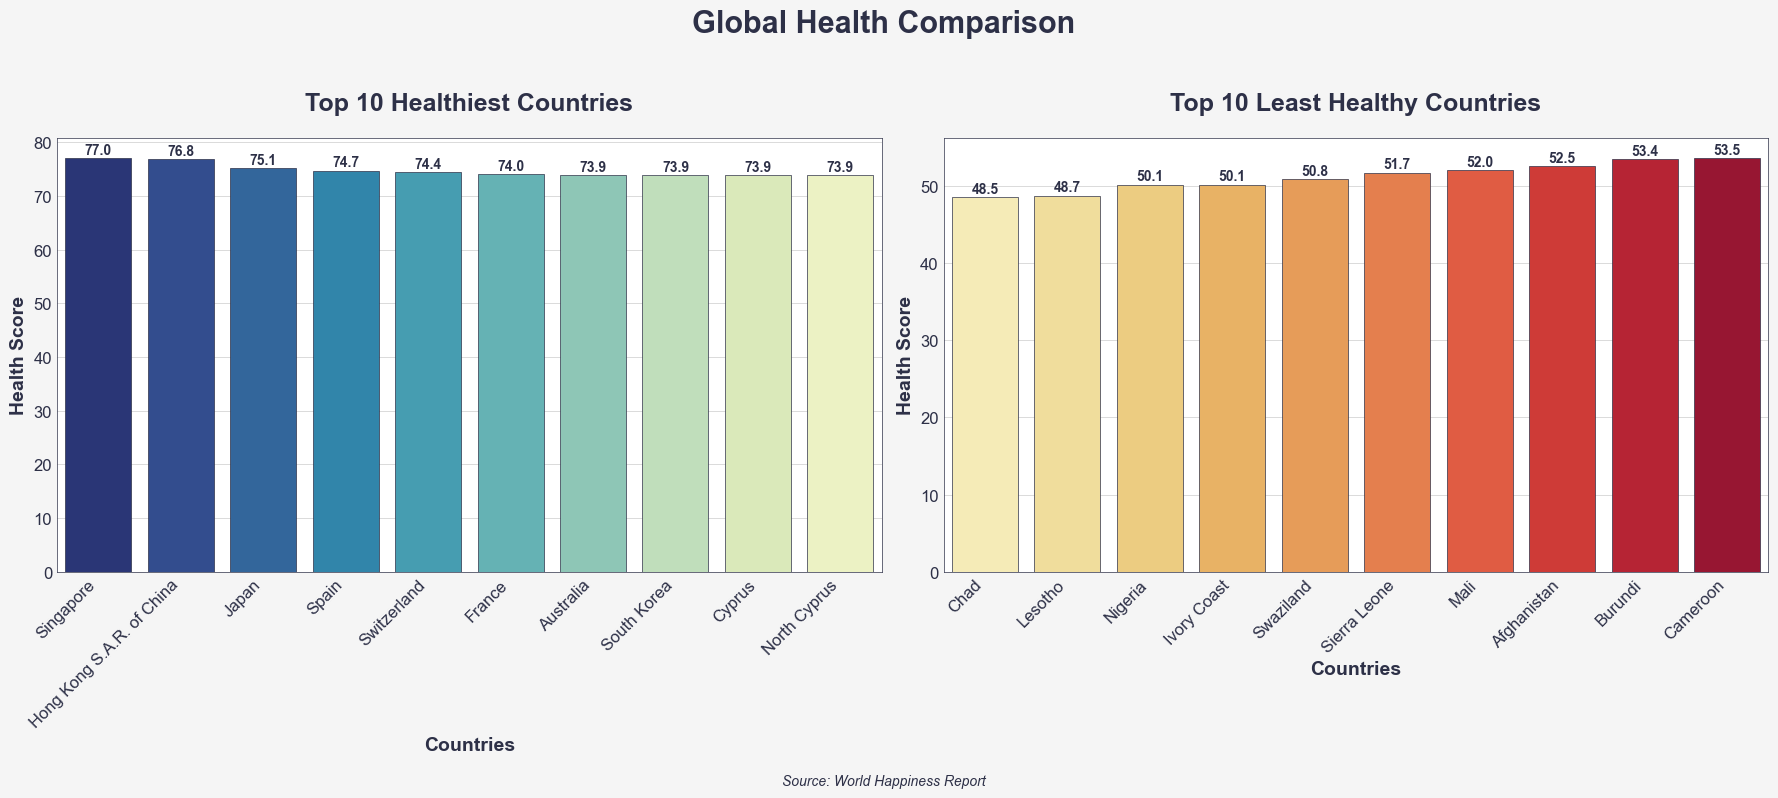

In [201]:
# Sort pre-existing DataFrames by 'Health'
top_10_happy_sorted = top_10_happy.sort_values('Health', ascending=False)
top_10_least_happy_sorted = top_10_least_happy.sort_values('Health', ascending=True)

# Create figure with custom background (override global figsize=(14, 8))
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.patch.set_facecolor(background_color)  # '#F5F5F5'
plt.subplots_adjust(wspace=0.2, bottom=0.15)

# Custom colormaps
happy_colors = sns.color_palette("YlGnBu_r", n_colors=len(top_10_happy_sorted))
least_happy_colors = sns.color_palette("YlOrRd", n_colors=len(top_10_least_happy_sorted))

# First subplot - Happiest countries
bars1 = sns.barplot(
    x='Country', 
    y='Health', 
    hue='Country', 
    palette=happy_colors, 
    data=top_10_happy_sorted, 
    legend=False, 
    ax=axes[0],
    edgecolor=text_color,  # '#2D3047' for subtle outlines
    linewidth=0.5
)
# Add data labels on top of bars
for bar in bars1.patches:
    value = bar.get_height()
    bars1.text(
        bar.get_x() + bar.get_width() / 2, 
        value + 0.2, 
        f'{value:.1f}', 
        ha='center', 
        va='bottom', 
        fontweight='bold', 
        color=text_color,  # '#2D3047'
        fontsize=10
    )
axes[0].set_title('Top 10 Healthiest Countries',  # Adjusted to reflect 'Health'
                  fontsize=title_font_size,  # 18
                  fontweight='bold', 
                  pad=20, 
                  color=text_color)
axes[0].set_xlabel('Countries', 
                   fontsize=label_font_size,  # 14
                   fontweight='bold', 
                   color=text_color)
axes[0].set_ylabel('Health Score',  # Adjusted to reflect 'Health'
                   fontsize=label_font_size,  # 14
                   fontweight='bold', 
                   color=text_color)
axes[0].tick_params(axis='x', rotation=45, labelsize=tick_font_size, colors=text_color)  # 12
axes[0].tick_params(axis='y', labelsize=tick_font_size, colors=text_color)
for tick in axes[0].get_xticklabels():
    tick.set_ha('right')

# Second subplot - Least healthy countries
bars2 = sns.barplot(
    x='Country', 
    y='Health', 
    hue='Country', 
    palette=least_happy_colors, 
    data=top_10_least_happy_sorted, 
    legend=False, 
    ax=axes[1],
    edgecolor=text_color,  # '#2D3047' for subtle outlines
    linewidth=0.5
)
# Add data labels on top of bars
for bar in bars2.patches:
    value = bar.get_height()
    bars2.text(
        bar.get_x() + bar.get_width() / 2, 
        value + 0.2, 
        f'{value:.1f}', 
        ha='center', 
        va='bottom', 
        fontweight='bold', 
        color=text_color,  # '#2D3047'
        fontsize=10
    )
axes[1].set_title('Top 10 Least Healthy Countries',  # Adjusted to reflect 'Health'
                  fontsize=title_font_size,  # 18
                  fontweight='bold', 
                  pad=20, 
                  color=text_color)
axes[1].set_xlabel('Countries', 
                   fontsize=label_font_size,  # 14
                   fontweight='bold', 
                   color=text_color)
axes[1].set_ylabel('Health Score',  # Adjusted to reflect 'Health'
                   fontsize=label_font_size,  # 14
                   fontweight='bold', 
                   color=text_color)
axes[1].tick_params(axis='x', rotation=45, labelsize=tick_font_size, colors=text_color)  # 12
axes[1].tick_params(axis='y', labelsize=tick_font_size, colors=text_color)
for tick in axes[1].get_xticklabels():
    tick.set_ha('right')

# Add a stylish figure title
fig.suptitle('Global Health Comparison',  # Adjusted to reflect 'Health'
             fontsize=22, 
             fontweight='bold', 
             color=text_color, 
             y=0.98)

# Add data source attribution
fig.text(0.5, 0.01, 'Source: World Happiness Report', 
         ha='center', 
         fontsize=10, 
         fontstyle='italic', 
         color=text_color)

# Subtle border for axes
for ax in axes:
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_edgecolor(text_color)

# Adjust layout for suptitle and text
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

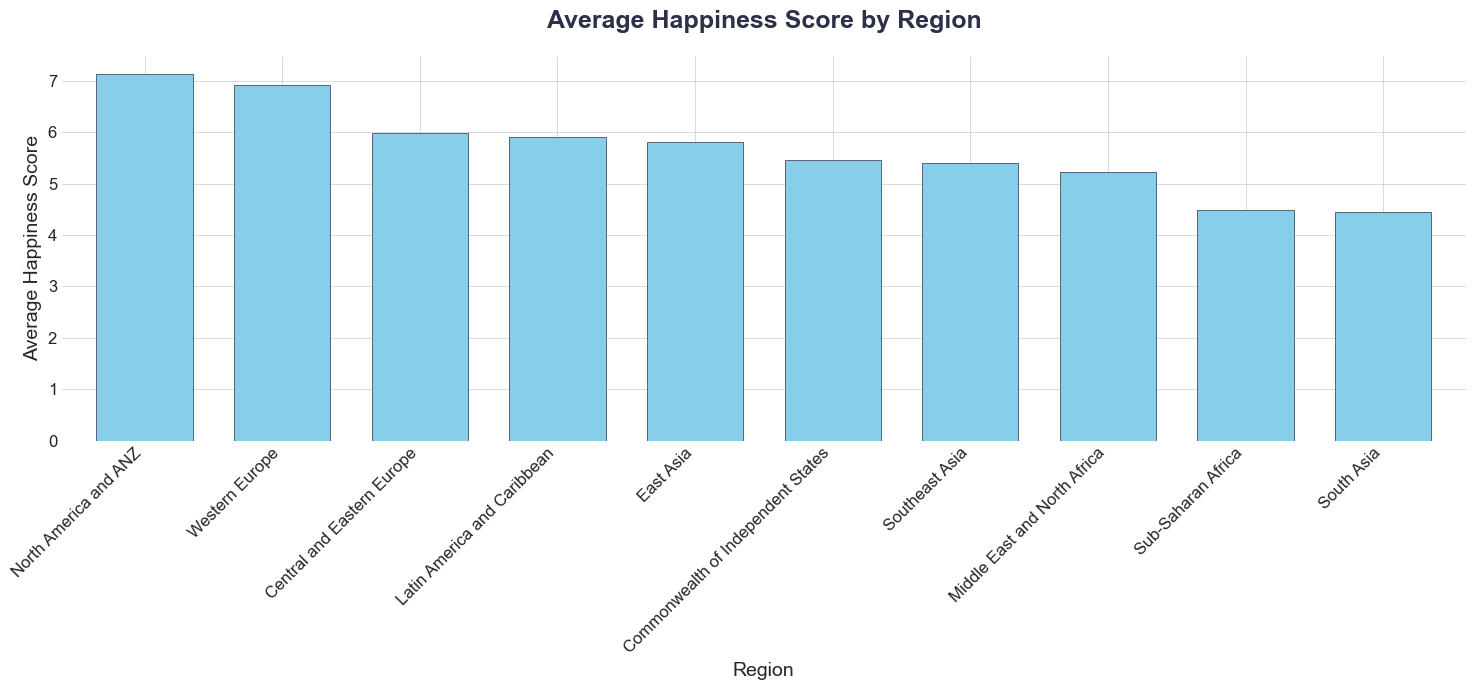

In [202]:

# Average happiness score by region
regional_avg = happy_df.groupby('Region')['Happiness'].mean().sort_values(ascending=False)
regional_avg.plot(
    kind='bar',
    color='skyblue',  
    edgecolor=text_color,  
    linewidth=0.5,
    width=0.7  
    )

plt.title('Average Happiness Score by Region', 
          fontsize=title_font_size,  # 18
          fontweight='bold', 
          pad=20
          )
plt.xticks(rotation=45, ha='right', fontsize=tick_font_size)  # 12
plt.yticks(fontsize=tick_font_size)  # 12
plt.xlabel('Region', fontsize=label_font_size)  # 14
plt.ylabel('Average Happiness Score', fontsize=label_font_size)  # 14
plt.tight_layout()

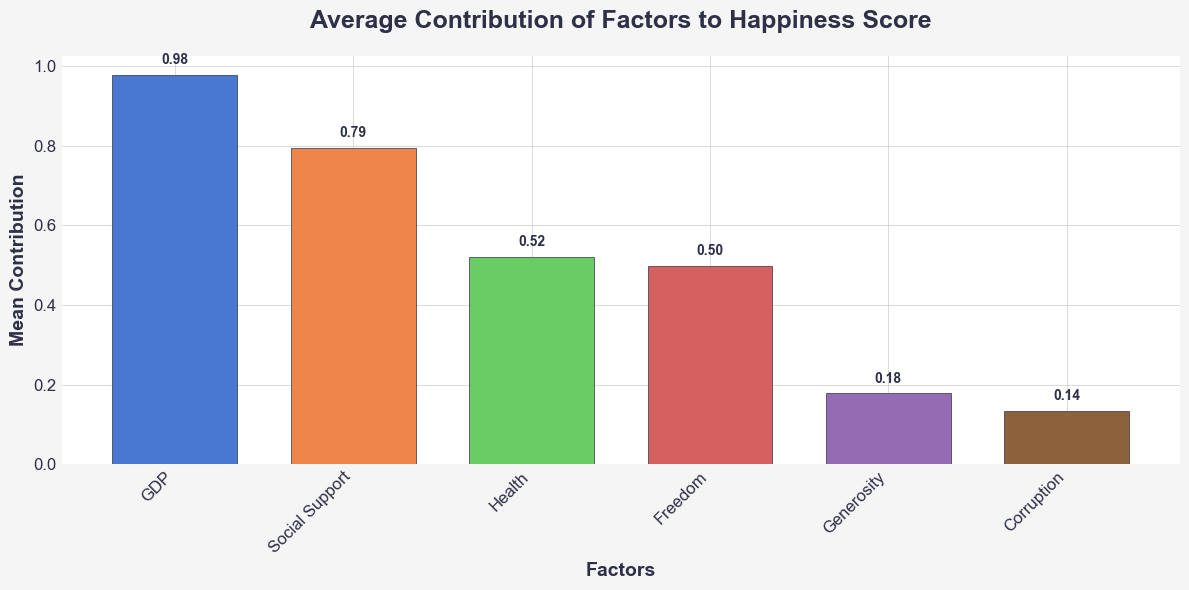

In [203]:
# Define factors based on likely columns in happy_df
#factors = ['GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption']
factors = ['Explained by: Log GDP per capita', 'Explained by: Social support',
           'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
           'Explained by: Generosity', 'Explained by: Perceptions of corruption']
short_labels = ['GDP', 'Social Support', 'Health', 'Freedom', 'Generosity', 'Corruption']  # Descriptive x-tick labels

# Calculate mean contributions
mean_contributions = data[factors].mean()

# Create figure (override global figsize=(14, 8) for this plot)
plt.figure(figsize=(12, 6))
fig = plt.gcf()
fig.patch.set_facecolor(background_color)  # '#F5F5F5'

# Plot with enhancements
bars = plt.bar(
    short_labels, 
    mean_contributions, 
    color=sns.color_palette('muted', n_colors=len(factors)),  # Muted palette
    edgecolor=text_color,  # '#2D3047' for outlines
    linewidth=0.5,
    width=0.7  # Narrower bars
)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.02,  # Small offset
        f'{height:.2f}', 
        ha='center', 
        va='bottom', 
        fontweight='bold', 
        color=text_color,  # '#2D3047'
        fontsize=10
    )

# Customize titles and labels
plt.title('Average Contribution of Factors to Happiness Score', 
          fontsize=title_font_size,  # 18
          fontweight='bold', 
          pad=20, 
          color=text_color)  # '#2D3047'
plt.xlabel('Factors', 
           fontsize=label_font_size,  # 14
           fontweight='bold', 
           color=text_color)
plt.ylabel('Mean Contribution', 
           fontsize=label_font_size,  # 14
           fontweight='bold', 
           color=text_color)

# Customize ticks
plt.xticks(rotation=45, ha='right', fontsize=tick_font_size, color=text_color)  # 12
plt.yticks(fontsize=tick_font_size, color=text_color)  # 12

# Tight layout for spacing
plt.tight_layout()

# Display the plot
plt.show()

In [226]:
regional_analysis = happy_df.groupby('Region').agg({
    'Happiness': ['mean', 'std', 'count'], 
    'GDP': 'mean',                          
    'Social': 'mean',                       
    'Health': 'mean'                        
}).round(3) 

print("Regional Analysis - Happiness Metrics by Region:")
print(regional_analysis)


Regional Analysis - Happiness Metrics by Region:
                                   Happiness                  GDP Social  \
                                        mean    std count    mean   mean   
Region                                                                     
Central and Eastern Europe             5.985  0.493    17  10.109  0.887   
Commonwealth of Independent States     5.467  0.438    12   9.402  0.872   
East Asia                              5.810  0.440     6  10.368  0.860   
Latin America and Caribbean            5.908  0.693    20   9.370  0.839   
Middle East and North Africa           5.220  0.999    17   9.666  0.798   
North America and ANZ                  7.128  0.138     4  10.810  0.934   
South Asia                             4.442  0.993     7   8.683  0.703   
Southeast Asia                         5.408  0.606     9   9.421  0.820   
Sub-Saharan Africa                     4.494  0.655    36   8.075  0.697   
Western Europe                         

The table shows happiness and related metrics for world regions:

- **Happiness**:  
  - **Mean**: Average happiness score (0-10).  
  - **Std**: How much scores vary (higher = more variation).  
  - **Count**: Number of countries in each region.  
- **GDP**: Average GDP per capita (log scale).  
- **Social**: Average social support (0-1, higher = more support).  
- **Health**: Healthy life expectancy (years).  

**Key insights:**  
- **Happiest regions**:  
  - **North America and ANZ** (mean 7.13, low variation).  
  - **Western Europe** (mean 6.92).  
- **Least happy regions**:  
  - **South Asia** (mean 4.44).  
  - **Sub-Saharan Africa** (mean 4.49, most countries).  
- **Wealth**: North America, ANZ, and Western Europe have the highest GDP.  
- **Support**: Strongest in North America and ANZ, weakest in Sub-Saharan Africa.  
- **Health**: Longest life expectancy in Western Europe (73 years), shortest in Sub-Saharan Africa (56 years).  

Happier regions generally have higher GDP, better social support, and longer life expectancy.

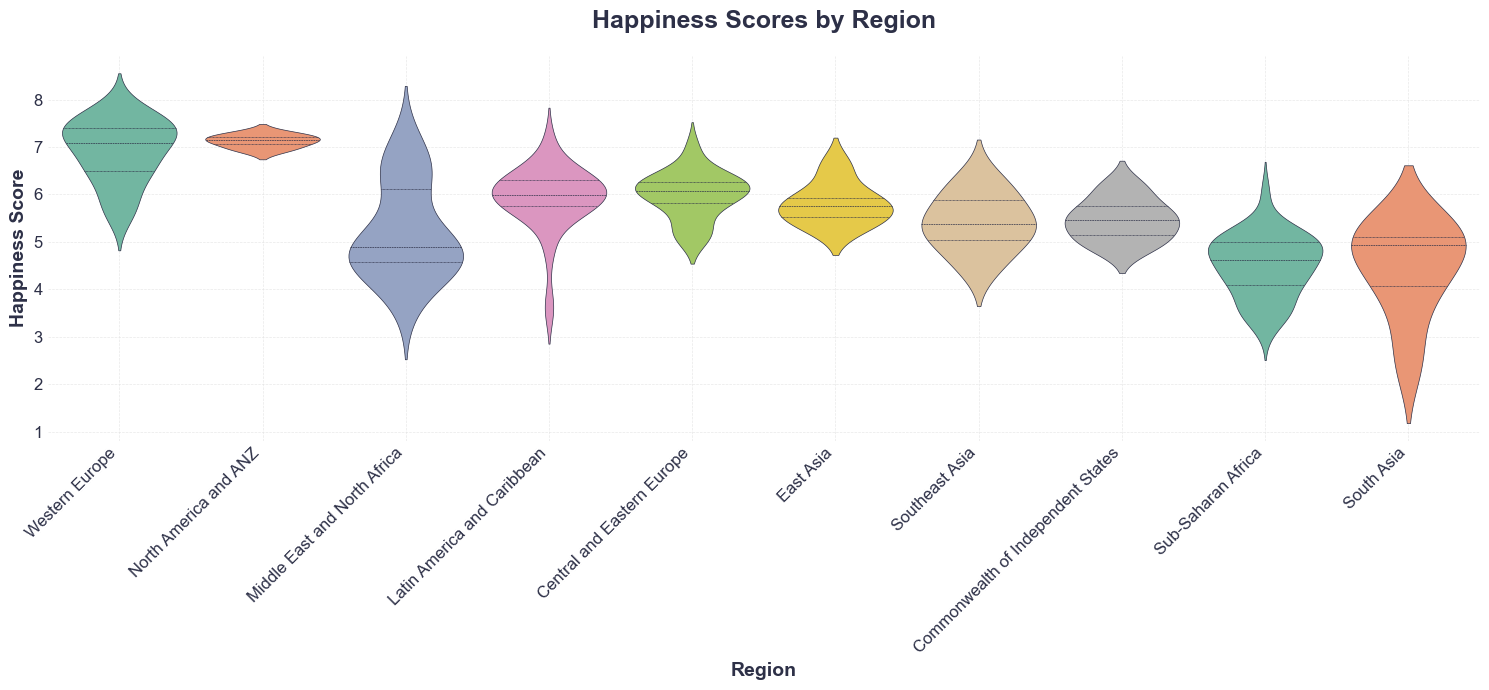

In [227]:

# Create a violin plot to show happiness distribution
# A violin plot shows how happiness scores spread out in each region
sns.violinplot(
    x='Region',              
    y='Happiness',           
    hue='Region',            
    data=happy_df,           
    palette='Set2',         
    inner='quartile',        # Show lines for 25%, 50%, 75% of data inside each violin
    linewidth=0.5,           
    edgecolor='#2D3047',     
    legend=False             
)

plt.title('Happiness Scores by Region', 
          fontsize=title_font_size,           
          fontweight='bold',     
          pad=20,                
          color=text_color)       
plt.xlabel('Region', 
           fontsize=label_font_size,          
           fontweight='bold',    
           color=text_color)      
plt.ylabel('Happiness Score', 
           fontsize=label_font_size,          
           fontweight='bold',    
           color='#2D3047')     

# Adjust the text on the axes
plt.xticks(rotation=45, ha='right', fontsize=tick_font_size, color=text_color) 
plt.yticks(fontsize=tick_font_size, color=text_color) 

# Add a faint grid to make the plot easier to read
plt.grid(True, linestyle='--', alpha=0.7, color='#E0E0E0')  

plt.tight_layout()
plt.show()

The violin plot shows how happiness scores are spread across regions:  

- **Narrow violins** (North America and ANZ, East Asia): Scores are closely clustered, meaning less variation.  
- **Wider violins** (Middle East, South Asia): Big gaps in happiness between countries.  
- **Low and wide violins** (Sub-Saharan Africa): Low scores with moderate variation.  

---

###  **Overall Patterns**

- **Happiest regions**: North America, ANZ, and Western Europe — strong economies, high support, long life expectancy.  
- **Least happy regions**: South Asia and Sub-Saharan Africa — lower wealth, support, and health.  
- **Middle ground**: Latin America, Central and Eastern Europe, and East Asia — moderate happiness with some variation.  
- **Key drivers of happiness**: Wealth, community support, and health.  

In short: richer, healthier regions with strong community ties are generally happier. Let me know if you want to dive deeper into any part!

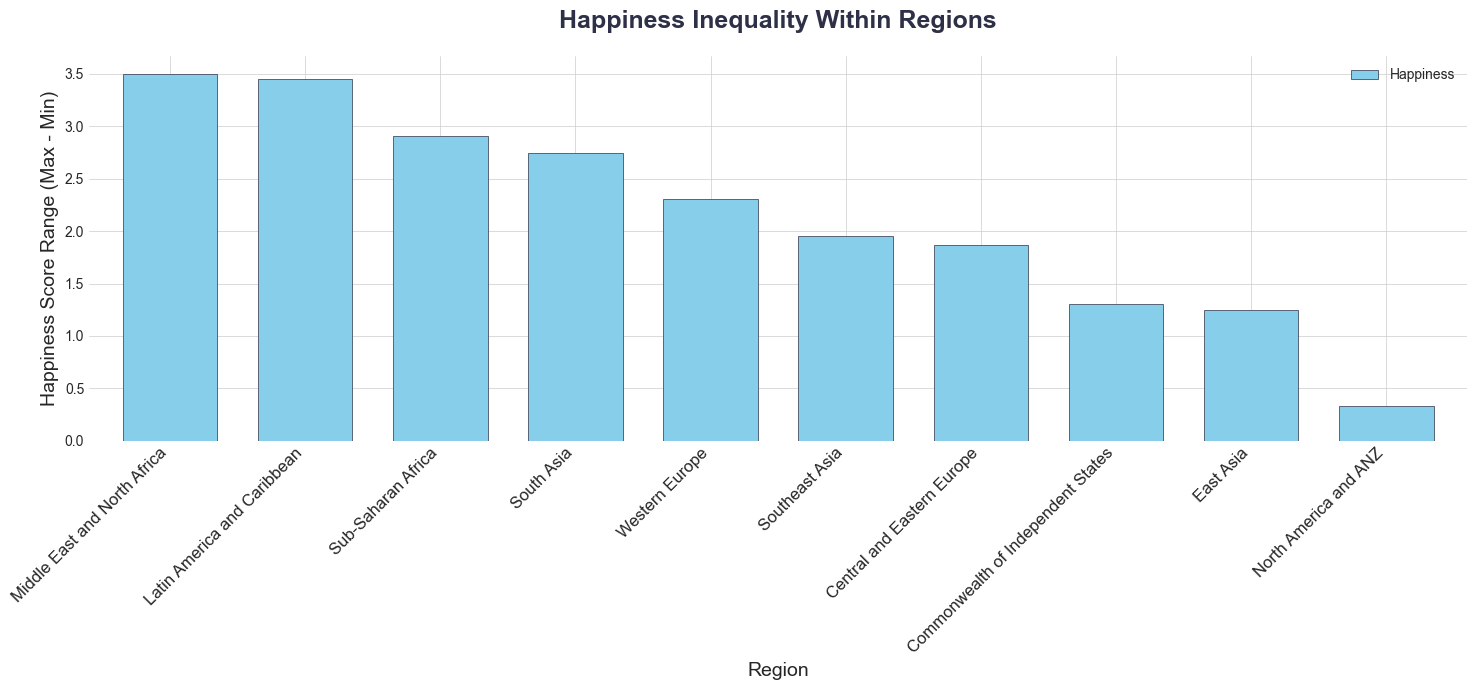

In [233]:
# Analyze inequality in happiness within regions
happiness_inequality = happy_df.groupby('Region').agg({
    'Happiness': lambda x: x.max() - x.min()
}).sort_values('Happiness', ascending=False)


happiness_inequality.plot(
    kind='bar',
    color='skyblue',
    edgecolor=text_color,
    linewidth=0.5,
    width=0.7
    )
plt.title('Happiness Inequality Within Regions', fontsize=title_font_size, fontweight='bold', pad=20)
plt.ylabel('Happiness Score Range (Max - Min)', fontsize=label_font_size)
plt.xlabel('Region', fontsize=label_font_size)
plt.xticks(rotation=45, ha='right', fontsize=tick_font_size)
plt.tight_layout()
plt.show()

### Happiness Inequality by Region

- High inequality: Middle East & North Africa, Latin America & Caribbean (~3.5 points)  
- Moderate: Sub-Saharan Africa, South Asia (2.5–3 points)  
- Low: Western Europe, Southeast Asia, Central & Eastern Europe, CIS (~2 points)  
- Lowest: East Asia (1.2), North America & ANZ (0.3)  

Happiness gaps are wider in regions with greater economic and social divides.

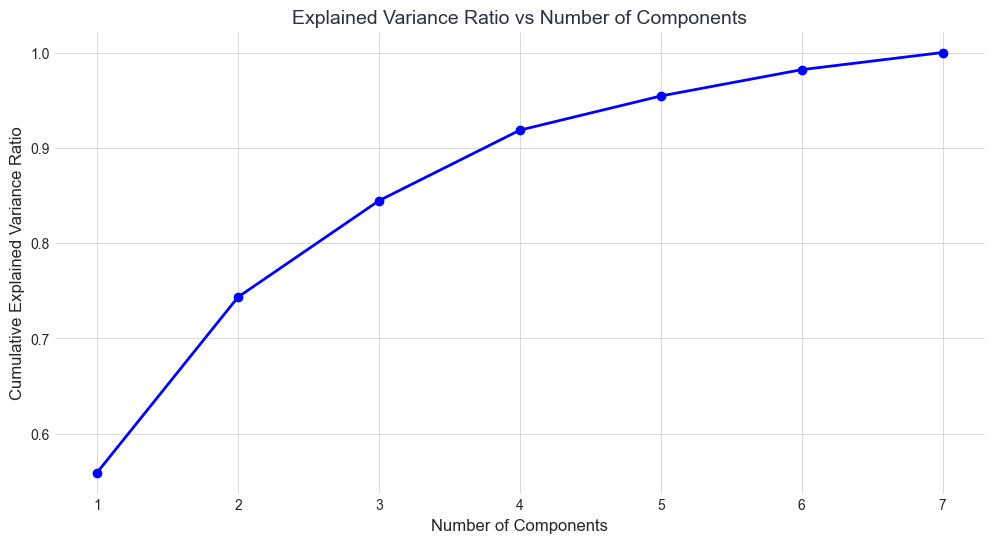

In [238]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical columns for PCA
numeric_cols = ['Happiness', 'GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption']
X = happy_df[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         cumulative_variance_ratio, 
         'bo-', 
         linewidth=2)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance Ratio vs Number of Components', fontsize=14)
plt.grid(True)
plt.show()




In [236]:
# Print explained variance ratio for each component
print("\nExplained variance ratio by component:")
for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")

# Create a DataFrame with component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(numeric_cols))],
    index=numeric_cols
)


Explained variance ratio by component:
PC1: 0.559 (55.9%)
PC2: 0.184 (18.4%)
PC3: 0.101 (10.1%)
PC4: 0.074 (7.4%)
PC5: 0.036 (3.6%)
PC6: 0.028 (2.8%)
PC7: 0.018 (1.8%)


In [235]:
# Calculate and print cumulative variance explained
print("\nCumulative variance explained:")
for i, cum_var in enumerate(cumulative_variance_ratio):
    print(f"First {i+1} components: {cum_var:.3f} ({cum_var*100:.1f}%)")

# Calculate optimal number of components for 90% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print(f"\nNumber of components needed for 90% variance explained: {n_components}")


Cumulative variance explained:
First 1 components: 0.559 (55.9%)
First 2 components: 0.743 (74.3%)
First 3 components: 0.844 (84.4%)
First 4 components: 0.918 (91.8%)
First 5 components: 0.954 (95.4%)
First 6 components: 0.982 (98.2%)
First 7 components: 1.000 (100.0%)

Number of components needed for 90% variance explained: 4


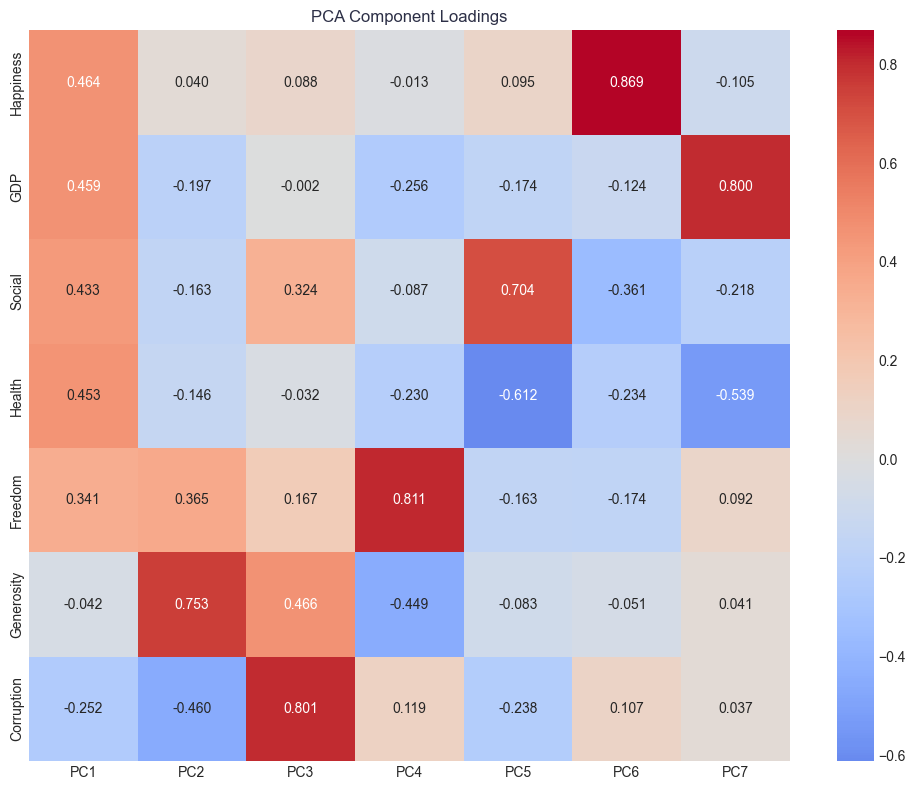

In [237]:
# Plot heatmap of component loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.3f')
plt.title('PCA Component Loadings')
plt.tight_layout()
plt.show()

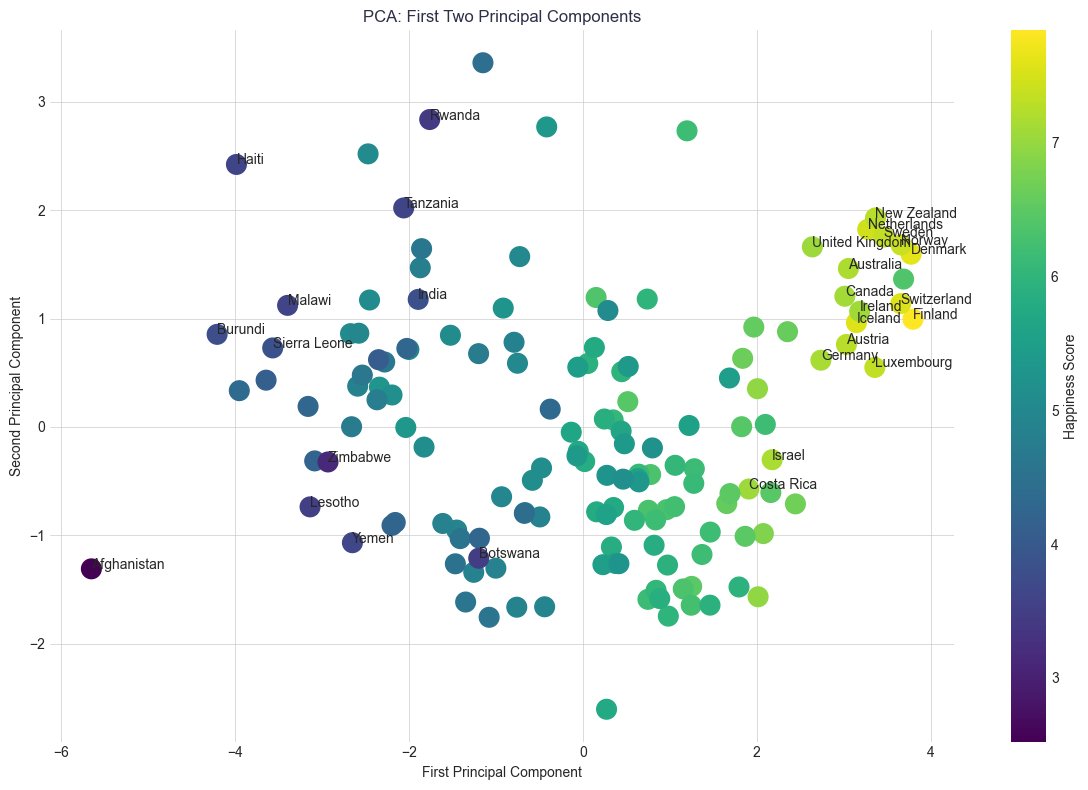

In [240]:

# Create scatter plot of first two principal components
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=happy_df['Happiness'],
                     cmap='viridis',
                     s=200
)
plt.colorbar(scatter, label='Happiness Score')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')

# Add country labels for some points
for i, country in enumerate(happy_df['Country']):
    if happy_df['Happiness'].iloc[i] > 7 or happy_df['Happiness'].iloc[i] < 4:
        plt.annotate(country, (X_pca[i, 0], X_pca[i, 1]))

plt.tight_layout()
plt.show()